In [6]:
import numpy as np
import scipy.integrate
%matplotlib inline
import matplotlib as mpl, matplotlib.pyplot as plt

from __future__ import print_function, division

mpl.rc('font', size=18)
mpl.rc('figure', figsize=(12,6))

NFW profile: $$\rho(r)=\frac{\rho_s}{\frac{r}{r_s}\left(1+\left(\frac{r}{r_s}\right)^2\right)}$$

In [7]:
# NFW density profile
def nfw(r, rs, rhos):
    return rhos / ((r/rs)*(1+(r/rs))**2)

rho_s = 10
r_s = 100
c = 10
r_vir = r_s * c

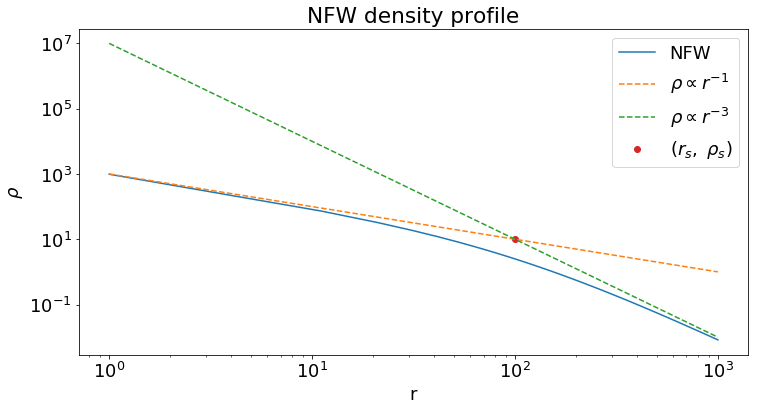

In [8]:
rads = np.linspace(1, r_vir, 100)
densities = nfw(rads, r_s, rho_s)

rad_to_minus_1 = rho_s / (rads/r_s)
rad_to_minus_3 = rho_s / (rads/r_s)**3

plt.figure()
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('r')
ax.set_ylabel(r'$\rho$')
ax.set_title('NFW density profile')
plt.plot(rads, densities, label='NFW')
plt.plot(rads, rad_to_minus_1, '--', label=r'$\rho\propto r^{-1}$')
plt.plot(rads, rad_to_minus_3, '--', label=r'$\rho\propto r^{-3}$')
plt.scatter(r_s, rho_s, c='tab:red', label=r'$(r_s,\ \rho_s)$')
plt.legend();

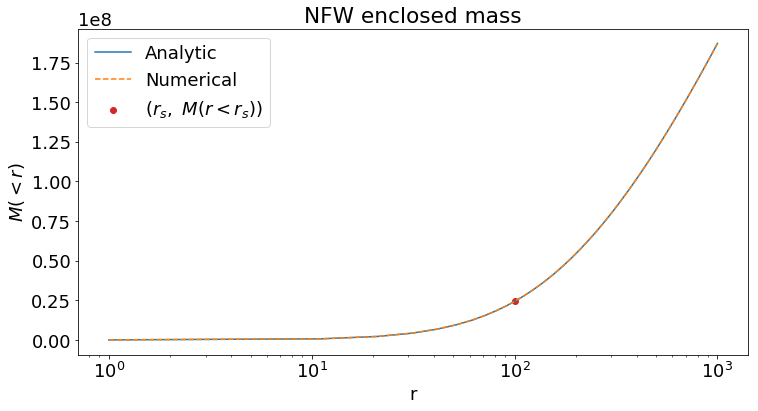

In [9]:
# Integrand for enclosed mass
def mass_integrand_numerical(r, rs, rhos):
    return 4 * np.pi * r**2 * nfw(r, rs, rhos)

# Analytic solution for enclosed mass
def mass_analytic(r, rs, rhos):
    return 4 * np.pi * rhos * rs**3 * (np.log((rs + r) / rs) - r / (rs + r)) 

ms_numerical = [scipy.integrate.quad(
    mass_integrand_numerical, 0., upper, args=(r_s, rho_s))[0] for upper in rads]
ms = mass_analytic(rads, r_s, rho_s)
    
plt.figure()
ax = plt.gca()
ax.set_title('NFW enclosed mass')
ax.set_xscale('log')
ax.set_xlabel('r')
ax.set_ylabel(r'$M(<r)$')
plt.plot(rads, ms, label = 'Analytic')
plt.plot(rads, ms_numerical, '--', label='Numerical')
plt.scatter(r_s, mass_analytic(r_s, r_s, rho_s), c='tab:red', label=r'$(r_s,\ M(r<r_s))$')
plt.legend();

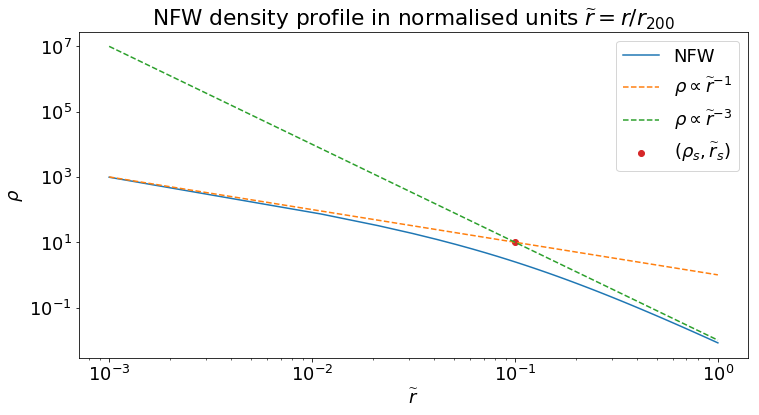

In [10]:
# NFW profile in normalised coordinates
def nfw_norm(rtw, c, rho0):
    x = rtw * c
    return rho0 / (x*(1+x)**2)

rs_norm = np.linspace(1 / r_vir, 1, 100)
densities_norm = nfw_norm(rs_norm, c, rho_s)

r_to_minus_1_norm = rho_s / (rs_norm * c)
r_to_minus_3_norm = rho_s / (rs_norm * c)**3

plt.figure()
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\widetilde{r}$')
ax.set_ylabel(r'$\rho$')
ax.set_title(r'NFW density profile in normalised units $\widetilde{r}=r/r_{200}$')
plt.plot(rs_norm, densities_norm, label='NFW')
plt.plot(rs_norm, r_to_minus_1_norm, '--', label=r'$\rho\propto \widetilde{r}^{-1}$')
plt.plot(rs_norm, r_to_minus_3_norm, '--', label=r'$\rho\propto \widetilde{r}^{-3}$')
plt.scatter(r_s / r_vir, rho_s, c='tab:red', label=r'$(\rho_s, \widetilde{r}_s)$')
plt.legend();

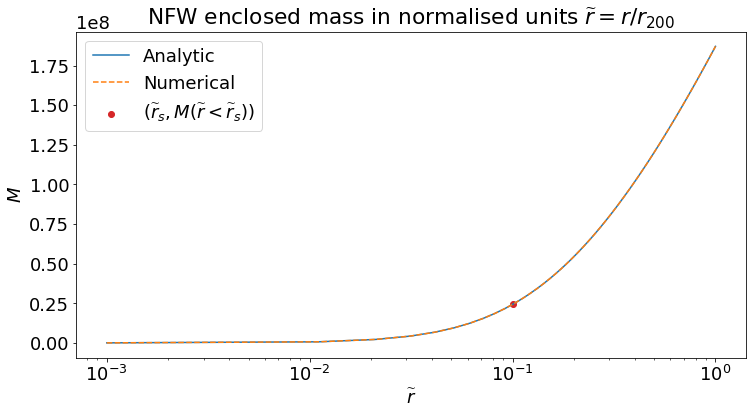

In [11]:
# Enclosed mass integrand in normalised coordinates
def mass_integrand_numerical_norm(rtw, rvir, c, rho0):
    return 4 * np.pi * rtw**2 * rvir**3 * nfw_norm(rtw, c, rho0)

# Analytic solution for enclosed mass in normalised coordinates
def mass_analytic_norm(rtw, rvir, c, rho0):
    #return (4 * np.pi * rho0 / c**2) * np.arctan(rtw * c)
    #return (4 * np.pi * rho0 / c**3) * 0.5 * np.log((rtw*c)**2 + 1)
    x = rtw * c
    return (4 * np.pi * rho0 * rvir**3 / c**3) * (1 / (x + 1) + np.log(x + 1) - 1)

ms_norm = mass_analytic_norm(rs_norm, r_vir, c, rho_s)
ms_numerical_norm = [scipy.integrate.quad(
    mass_integrand_numerical_norm, 0., upper, args=(r_vir, c, rho_s))[0] for upper in rs_norm]
M_vir = mass_analytic_norm(1, r_vir, c, rho_s)

plt.figure()
ax = plt.gca()
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel(r'$\widetilde{r}$')
ax.set_ylabel(r'$M$')
ax.set_title(r'NFW enclosed mass in normalised units $\widetilde{r}=r/r_{200}$')
plt.plot(rs_norm, ms_norm, label='Analytic')
plt.plot(rs_norm, ms_numerical_norm, '--', label='Numerical')
plt.scatter(r_s / r_vir, mass_analytic_norm(r_s / r_vir, r_vir, c, rho_s), c='tab:red', label=r'$(\widetilde{r}_s, M(\widetilde{r}<\widetilde{r}_s))$')
plt.legend();

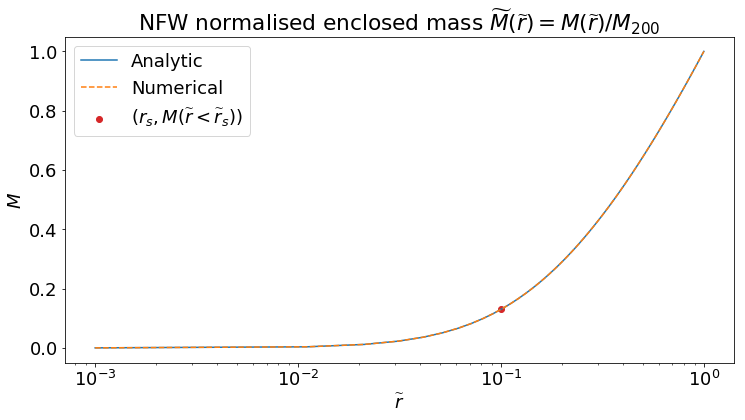

In [12]:
plt.figure()
ax = plt.gca()
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel(r'$\widetilde{r}$')
ax.set_ylabel(r'$M$')
ax.set_title(r'NFW normalised enclosed mass $\widetilde{M}(\widetilde{r})=M(\widetilde{r})/M_{200}$')
plt.plot(rs_norm, ms_norm / M_vir, label='Analytic')
plt.plot(rs_norm, ms_numerical_norm / M_vir, '--', label='Numerical')
plt.scatter(r_s / r_vir, mass_analytic_norm(r_s / r_vir, r_vir, c, rho_s) / M_vir, c='tab:red', label=r'$(r_s, M(\widetilde{r}<\widetilde{r}_s))$')
plt.legend();

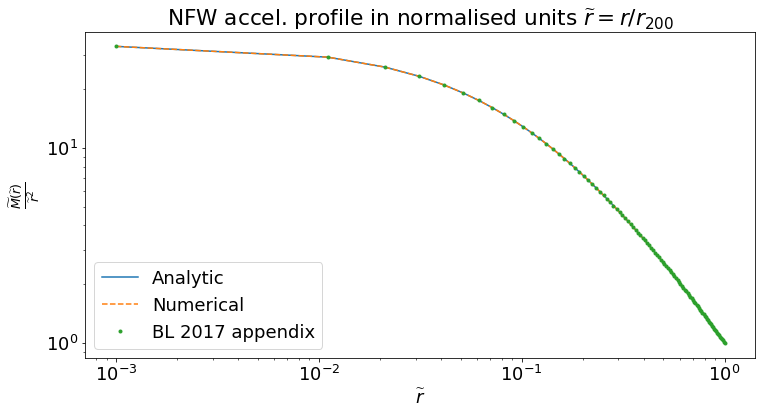

In [13]:
# Acceleration profile (M(<r)/r^2) from ABL et al in normalised coordinates
def accel_literature_norm(c, rtw):
    x = rtw * c
    return rtw**(-2) * (np.log(1 + x) - x/(1 + x)) / (np.log(1 + c) - c / (1 + c))

accels_norm = accel_literature_norm(c, rs_norm)

plt.figure()
ax = plt.gca()
ax.set_title(r'NFW accel. profile in normalised units $\widetilde{r}=r/r_{200}$')
ax.set_xlabel(r'$\widetilde{r}$')
ax.set_ylabel(r'$\frac{\widetilde{M}(\widetilde{r})}{\widetilde{r}^2}$')
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot(rs_norm, ms_norm / (M_vir * rs_norm**2), label='Analytic')
plt.plot(rs_norm, ms_numerical_norm / (M_vir * rs_norm**2), '--', label='Numerical')
plt.plot(rs_norm, accels_norm, '.', label='BL 2017 appendix')
plt.legend();